# Phase1  Exploring the Data from Season 1 of Game of Thrones
## Question:  Which character had the greatest downward trend in prominance throught the series?

Examining how the csv files are organized , we see a seperation between a table of all the characters(nodes.csv) and
a table of all the relationships of those characters (edges.csv)

In the s1_edges dataframe: the 'Source' & 'Target' columns are the character nodes in the interactions and the 'Weight' column is the number of interactions in the scenes of the season

In the s1_nodes dataframe: the 'Id' is the character name and 'Label' appears to be a casual version that the character is refferenced by in the series. 

In [5]:
import pandas as pd 
import networkx as n
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import skew

# Read in the csv files for season 1, season 1 edges and season 1 nodes
s1_edges = pd.read_csv('gameofthrones/data/got-s1-edges.csv')
s1_nodes = pd.read_csv('gameofthrones/data/got-s1-nodes.csv')

# Examine the first 5 rows of edges to get an idea of the column and rows
print(s1_edges.head(5), '\n')

# Examine the first 5 rows of nodes to get a dataframe of the lists of characters in GoT

print(s1_nodes.head(5))

         Source  Target  Weight  Season
0           NED  ROBERT     192       1
1      DAENERYS   JORAH     154       1
2           JON     SAM     121       1
3  LITTLEFINGER     NED     107       1
4           NED   VARYS      96       1 

               Id     Label
0  ADDAM_MARBRAND     Addam
1           AEGON     Aegon
2           AERYS     Aerys
3  ALLISER_THORNE  Allister
4            ARYA      Arya


For consistency and ease of manipulation I will set the column of characters as the index of both dataframes. For the edges dataframe we will use the 'Source' column , but we will rename it 'Id' for consistency with both dataframes

In [10]:
#Create identical column names and set the character id as index for manipulation
s1_edges_index = s1_edges.rename(columns={'Source':'Id'}).set_index('Id')
s1_nodes_index = s1_nodes.set_index('Id')

print(s1_edges_index.head(5) , '\n',s1_nodes_index.head(5))


              Target  Weight  Season
Id                                  
NED           ROBERT     192       1
DAENERYS       JORAH     154       1
JON              SAM     121       1
LITTLEFINGER     NED     107       1
NED            VARYS      96       1 
                    Label
Id                      
ADDAM_MARBRAND     Addam
AEGON              Aegon
AERYS              Aerys
ALLISER_THORNE  Allister
ARYA                Arya


In [4]:
''''import pandas as pd 
import networkx as n
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import skew
# Read in the csv files for season 1, season 1 edges and season 1 nodes
s1_edges = pd.read_csv('gameofthrones/data/got-s1-edges.csv')
s1_nodes = pd.read_csv('gameofthrones/data/got-s1-nodes.csv') 

# Examine the first 5 rows of edges to get an idea of the column and rows
# The 'Source' & 'Target' columns are the character nodes in the interactions 
# and the 'Weight' column is the number of interactions in the scenes of the season
print(s1_edges.head(5), '\n')

# Examine the first 5 rows of nodes to get a dataframe of the lists of characters in GoT
# Organized by an 'Id' and 'Label'
print(s1_nodes.head(5))


#Create identical column names and set the character id as index for manipulation
s1_edges_index = s1_edges.rename(columns={'Source':'Id'}).set_index('Id')
s1_nodes_index = s1_nodes.set_index('Id')

print(s1_edges_index.head(5) , s1_nodes_index.head(5)) 
 

# Group the dataframe by the sum of all interactions per character
df_sum = s1_edges_index.groupby(s1_edges_index.index)['Weight'].sum()
# Group the dataframe by the count of characters interacted 
df_count = s1_edges_index.groupby(s1_edges_index.index)['Weight'].count()

#Create a histograph to see the distribution of the Sum and Count dataframes

#Using the distribution to find insight about the series and the characters involved
plt.subplot(121)
plt.title('Frequency of Characters by the \nSum of Interactions in the Season')
df_sum.hist(figsize=(15, 7), bins=20) 
plt.axvline(df_sum.mean(), color='purple', linestyle='dashed', linewidth=2, alpha=.4)
plt.axvline(df_sum.median(), color='red', linestyle='dashed', linewidth=2, alpha=.4)
plt.ylabel('# of Characters')
plt.xlabel('Sum of Interactions')
_, max_ = plt.ylim()
plt.text(df_sum.mean() + df_sum.mean()*.01, max_ - max_*.25, 'Mean: {:.2f}'.format(df_sum.mean()), weight='bold')
plt.text(df_sum.median() + df_sum.median()*.01 , max_-max_*.1 ,'Median: {:.2f}'.format(df_sum.median()), weight='bold')



plt.subplot(122)
plt.title('Frequency of Characters by the \nAmount of Characters Interacted in the Season')
df_count.hist(figsize=(15, 7), bins=20)
plt.axvline(df_count.mean(), color='purple', linestyle='dashed', linewidth=2, alpha=.4)
plt.axvline(df_count.median(), color='red', linestyle='dashed', linewidth=2, alpha=.4)
plt.ylabel('# of Characters')
plt.xlabel('Count of Characters Interacted')
_, max_ = plt.ylim()
plt.text(df_count.mean() + df_count.mean()*.01, max_ - max_*.25, 'Mean: {:.2f}'.format(df_count.mean()), weight='bold')
plt.text(df_count.median() + df_count.median()*.01 , max_-max_*.1 ,'Median: {:.2f}'.format(df_count.median()), weight='bold')
plt.show() 



# Find the list of 5 characters that have the highest number of interactions 
# Find the list of 5 characters that interacted with the greatest number of characters
print('SUM', s1_edges_index.groupby(s1_edges_index.index)['Weight'].sum().sort_values().tail(5),'\nCOUNT',
s1_edges_index.groupby(s1_edges_index.index)['Weight'].count().sort_values().tail(5))
# The skew is greater than 1 so it is highly skewed to the right
print('\tSkew\nSum: ', skew(df_sum),' Count: ', skew(df_count))

# Calculate the 95% percentile to find where the top 5% of all summed interactions start
# Then filter the dataframe using that information to list the characters involved 
print('Top 5% of total interactions were {:0.0f} interactions or higher \n'.format
      ((np.floor(df_sum.quantile(.95))+1)))

print('This top 5% involves the following characters: \n',df_sum.loc[lambda x:x>np.floor(df_sum.quantile(.95))].sort_values().reset_index())
# Calculate the 95% percentile to find where the top 5% of all counted interactions start
# Then filter the dataframe using that information to list the characters involved 
print('Top 5% of total characters interacted were {:0.0f} number of characters interacted or higher \n'.format
      ((np.floor(df_count.quantile(.95))+1)))

print('This top 5% involves the following characters: \n',df_count.loc[lambda x:x>np.floor(df_count.quantile(.95))].sort_values().reset_index())

#----df_sum.loc[lambda x:x>np.floor(df_sum.quantile(.95))].sort_values().reset_index().values

#Insight starts here. '''


"'import pandas as pd \nimport networkx as n\nimport matplotlib.pyplot as plt \nimport numpy as np\nfrom scipy.stats import skew\n# Read in the csv files for season 1, season 1 edges and season 1 nodes\ns1_edges = pd.read_csv('gameofthrones/data/got-s1-edges.csv')\ns1_nodes = pd.read_csv('gameofthrones/data/got-s1-nodes.csv') \n\n# Examine the first 5 rows of edges to get an idea of the column and rows\n# The 'Source' & 'Target' columns are the character nodes in the interactions \n# and the 'Weight' column is the number of interactions in the scenes of the season\nprint(s1_edges.head(5), '\n')\n\n# Examine the first 5 rows of nodes to get a dataframe of the lists of characters in GoT\n# Organized by an 'Id' and 'Label'\nprint(s1_nodes.head(5))\n\n\n#Create identical column names and set the character id as index for manipulation\ns1_edges_index = s1_edges.rename(columns={'Source':'Id'}).set_index('Id')\ns1_nodes_index = s1_nodes.set_index('Id')\n\nprint(s1_edges_index.head(5) , s1_nod

In [7]:
# Group the dataframe by the sum of all interactions per character
df_sum = s1_edges_index.groupby(s1_edges_index.index)['Weight'].sum()
# Group the dataframe by the count of characters interacted 
df_count = s1_edges_index.groupby(s1_edges_index.index)['Weight'].count()
print(df_sum.head(5) , df_count.head(5))

Id
ADDAM_MARBRAND      8
AEGON               4
AERYS              39
ALLISER_THORNE     73
ARYA              373
Name: Weight, dtype: int64 Id
ADDAM_MARBRAND     3
AEGON              2
AERYS             12
ALLISER_THORNE     8
ARYA              28
Name: Weight, dtype: int64


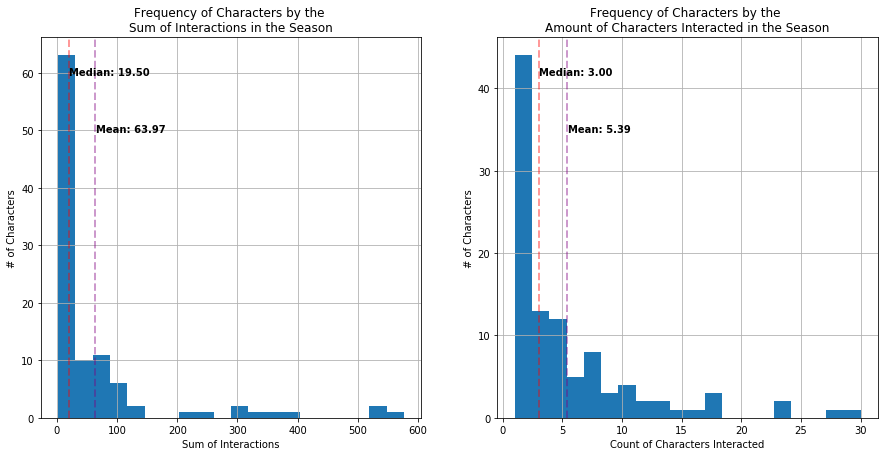

In [8]:
#Create a histograph to see the distribution of the Sum and Count dataframes

#Using the distribution to find insight about the series and the characters involved
plt.subplot(121)
plt.title('Frequency of Characters by the \nSum of Interactions in the Season')
df_sum.hist(figsize=(15, 7), bins=20) 
plt.axvline(df_sum.mean(), color='purple', linestyle='dashed', linewidth=2, alpha=.4)
plt.axvline(df_sum.median(), color='red', linestyle='dashed', linewidth=2, alpha=.4)
plt.ylabel('# of Characters')
plt.xlabel('Sum of Interactions')
_, max_ = plt.ylim()
plt.text(df_sum.mean() + df_sum.mean()*.01, max_ - max_*.25, 'Mean: {:.2f}'.format(df_sum.mean()), weight='bold')
plt.text(df_sum.median() + df_sum.median()*.01 , max_-max_*.1 ,'Median: {:.2f}'.format(df_sum.median()), weight='bold')



plt.subplot(122)
plt.title('Frequency of Characters by the \nAmount of Characters Interacted in the Season')
df_count.hist(figsize=(15, 7), bins=20)
plt.axvline(df_count.mean(), color='purple', linestyle='dashed', linewidth=2, alpha=.4)
plt.axvline(df_count.median(), color='red', linestyle='dashed', linewidth=2, alpha=.4)
plt.ylabel('# of Characters')
plt.xlabel('Count of Characters Interacted')
_, max_ = plt.ylim()
plt.text(df_count.mean() + df_count.mean()*.01, max_ - max_*.25, 'Mean: {:.2f}'.format(df_count.mean()), weight='bold')
plt.text(df_count.median() + df_count.median()*.01 , max_-max_*.1 ,'Median: {:.2f}'.format(df_count.median()), weight='bold')
plt.show()


In [9]:
# Find the list of 5 characters that have the highest number of interactions 
# Find the list of 5 characters that interacted with the greatest number of characters
print('SUM', s1_edges_index.groupby(s1_edges_index.index)['Weight'].sum().sort_values().tail(5),'\nCOUNT',
s1_edges_index.groupby(s1_edges_index.index)['Weight'].count().sort_values().tail(5))
# The skew is greater than 1 so it is highly skewed to the right
print('\tSkew\nSum: ', skew(df_sum),' Count: ', skew(df_count))

# Calculate the 95% percentile to find where the top 5% of all summed interactions start
# Then filter the dataframe using that information to list the characters involved 
print('Top 5% of total interactions were {:0.0f} interactions or higher \n'.format
      ((np.floor(df_sum.quantile(.95))+1)))

print('This top 5% involves the following characters: \n',df_sum.loc[lambda x:x>np.floor(df_sum.quantile(.95))].sort_values().reset_index())
# Calculate the 95% percentile to find where the top 5% of all counted interactions start
# Then filter the dataframe using that information to list the characters involved 
print('Top 5% of total characters interacted were {:0.0f} number of characters interacted or higher \n'.format
      ((np.floor(df_count.quantile(.95))+1)))

print('This top 5% involves the following characters: \n',df_count.loc[lambda x:x>np.floor(df_count.quantile(.95))].sort_values().reset_index())


SUM Id
ARYA        373
CERSEI      392
CATELYN     533
DAENERYS    533
NED         577
Name: Weight, dtype: int64 
COUNT Id
JOFFREY    18
NED        23
CERSEI     23
ARYA       28
CATELYN    30
Name: Weight, dtype: int64
	Skew
Sum:  2.868708181451038  Count:  2.0915642277326842
Top 5% of total interactions were 324 interactions or higher 

This top 5% involves the following characters: 
          Id  Weight
0       JON     324
1      ARYA     373
2    CERSEI     392
3   CATELYN     533
4  DAENERYS     533
5       NED     577
Top 5% of total characters interacted were 18 number of characters interacted or higher 

This top 5% involves the following characters: 
         Id  Weight
0     BRAN      18
1  JOFFREY      18
2   CERSEI      23
3      NED      23
4     ARYA      28
5  CATELYN      30
